# NYPD Motor Vehicle Collision Data<a id='Top'></a>

### Overview

The "Motor Vehicle Collisions - Crashes" dataset available through New York City's Open Data program contains information about reported vehicle crashes in NYC. Each row contains details on a single crash event. 

The data contains records from 2012 to today, with data updated on a daily basis. At the time of this writing, there are 1.61 million rows, each row representing a crash event, and 29 columns. 

In this notebook we will analyze this data as follows:

1. [Importing](#Importing)
2. [Understanding](#Understanding)
    - [Column Contents](#column_contents)
    - [Descriptive Statistics](#descriptive_statistics)
    - [Columns Missing Data](#empty)
3. [Transforming](#Transforming)
    - [Dropping Columns](#Drop)
    - [Renaming Data](#Renaming)
    - [Redundant Columns](#Redundant)
    - [Data Types](#data_type)
    - [Categorizing](#categorizing)
4. [Analyzing](#Analyzing)
5. [Statistical Analysis](#statistical_analysis)
6. [Visualizing](#Visualizations)
    - [Number of Deaths by Borough](#Fataities_by_borough) 
    - [Number of Deaths by Hour](#Fataities_by_hour)
    - [Number of Accidents by Season](#accidents_by_season)
    - [Fatal Car Crash Locations](#car_crash_locations)
    - [Contributing Factor Trends](#contributing_factor_trends)
    - [Contributing Factors to Crash Fatalities](#Factor_Bar_Plot)
    - [Fatalities to Pedestrians vs Cyclists vs Motorist](#Fataity_Grouped_Series)
    - [Fatal Crash Frequency Over Time](#Fatality_Time_Scatterplot)
    - [Crash Factor Percentages in Queens](#queens_crash_causes)
7. [End of Document](#Bottom)


* The dataset can be found by following this link: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions-Crashes/h9gi-nx95

### Importing the Data<a id='Importing'></a>

Let's begin by importing a few libraries we will use later in the notebook, and then bring the first two million rows of NYPD Motor Vehicle Collision Data using pandas. We are over-estimating the number of rows, to leave room for more data if this is run in the future.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import sys
from IPython.core.display import display, HTML

In [2]:
datanyc = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=2000000", low_memory=False)

And let's pull up the data dictionary supplied by the Open Data website for reference.

In [3]:
data_dict = pd.read_excel("https://data.cityofnewyork.us/api/views/h9gi-nx95/files/2e58023a-21a6-4c76-b9e8-0101bf7509ca?download=true&filename=MVCollisionsDataDictionary.xlsx",
                         sheet_name='Column Info',  header=1)
data_dict.head()

,Table Name,Column Name,Column Description,Primary Key or Foreign Key,"Additional Notes (where applicable, includes the range of possible values, units of measure, how to interpret null/zero values, whether there are specific relationships between columns, and/or information on column source)"
0,MV-Collisions - Crash,UNIQUE_ID,Unique record code generated by system,Primary Key for the crash table,NaN
1,MV-Collisions - Crash,ACCIDENT_DATE,Occurrence date of collision,NaN,NaN
2,MV-Collisions - Crash,ACCIDENT_TIME,Occurrence time of collision,NaN,NaN
3,MV-Collisions - Crash,BOROUGH,Borough where collision occurred,NaN,NaN
4,MV-Collisions - Crash,ZIP CODE,Postal code of incident occurrence,NaN,NaN


### Understanding the Data <a id='Understanding'></a>
Let's look at the first few rows of the dataset. 

In [4]:
pd.set_option('display.max_columns', None) # This allows us to view all columns in a dataframe when called
pd.set_option('display.max_rows', 200) # This returns 200 rows at max to prevent accidents when writing code
datanyc.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2019-04-06T00:00:00.000,13:00,STATEN ISLAND,10306,40.571987,-74.108230,POINT (-74.10823 40.571987),NaN,NaN,2424 HYLAN BOULEVARD,1.0,0.0,1,0,0,0,0,0,View Obstructed/Limited,NaN,NaN,NaN,NaN,4109794,Sedan,NaN,NaN,NaN,NaN
1,2019-04-09T00:00:00.000,18:50,BROOKLYN,11220,40.633675,-74.009640,POINT (-74.00964 40.633675),NaN,NaN,850 62 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4111841,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2,2019-04-23T00:00:00.000,9:00,MANHATTAN,10001,40.745830,-73.991920,POINT (-73.99192 40.74583),NaN,NaN,121 WEST 27 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4121967,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,2019-04-03T00:00:00.000,8:55,STATEN ISLAND,10301,40.644073,-74.077774,POINT (-74.077774 40.644073),STUYVESANT PLACE,WALL STREET,NaN,1.0,0.0,1,0,0,0,0,0,Reaction to Uninvolved Vehicle,NaN,NaN,NaN,NaN,4110892,Sedan,NaN,NaN,NaN,NaN
4,2019-04-03T00:00:00.000,9:31,NaN,NaN,NaN,NaN,NaN,188 STREET,GRAND CENTRAL PARKWAY,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4108091,Sedan,Sedan,NaN,NaN,NaN


... And get overall information about the contents of the data. <a id='column_contents'></a>

In [5]:
pd.options.display.max_info_rows = 5000000
datanyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617414 entries, 0 to 1617413
Data columns (total 29 columns):
crash_date                       1617414 non-null object
crash_time                       1617414 non-null object
borough                          1126400 non-null object
zip_code                         1126203 non-null object
latitude                         1420116 non-null float64
longitude                        1420116 non-null float64
location                         1420116 non-null object
on_street_name                   1300003 non-null object
off_street_name                  1074186 non-null object
cross_street_name                225246 non-null object
number_of_persons_injured        1617397 non-null float64
number_of_persons_killed         1617383 non-null float64
number_of_pedestrians_injured    1617414 non-null int64
number_of_pedestrians_killed     1617414 non-null int64
number_of_cyclist_injured        1617414 non-null int64
number_of_cyclist_killed        

Each column should contain approxamitely 1.6 million values. There are some columns with considerably fewer entries. Let's find the percentage of the missing values and see which columns have the most amount of missing values. We will get a mean of missing values and then round it to the second decimal.

In [6]:
pd.set_option('display.max_columns', 29)
datanyc.isnull().mean().round(4) * 100

crash_date                        0.00
crash_time                        0.00
borough                          30.36
zip_code                         30.37
latitude                         12.20
longitude                        12.20
location                         12.20
on_street_name                   19.62
off_street_name                  33.59
cross_street_name                86.07
number_of_persons_injured         0.00
number_of_persons_killed          0.00
number_of_pedestrians_injured     0.00
number_of_pedestrians_killed      0.00
number_of_cyclist_injured         0.00
number_of_cyclist_killed          0.00
number_of_motorist_injured        0.00
number_of_motorist_killed         0.00
contributing_factor_vehicle_1     0.26
contributing_factor_vehicle_2    13.47
contributing_factor_vehicle_3    93.53
contributing_factor_vehicle_4    98.65
contributing_factor_vehicle_5    99.66
collision_id                      0.00
vehicle_type_code1                0.34
vehicle_type_code2       

Wow! Some columns have a lot of missing values. 

For some it makes sense. `contributing_factor_vehicle_2` or `contributing_factor_vehicle_3` may be missing simply because there were no second or third contributing factors to the collision.  Other than those, for example `borough` column has 30% of its values missing. 

It looks like `contributing_factor_vehicle_3`, `contributing_factor_vehicle_4`, `contributing_factor_vehicle_5` and `vehicle_type_code_3`, `vehicle_type_code_4`, `vehicle_type_code_5` have very few values compared to the others. We will take a closer look at them when we start transforming our data.

For now, we will use the `describe` function to generate some descriptive statistics. This will work on numeric and object series, and may point out any glaring holes in the data. <a id='descriptive_statistics'></a>

In [7]:
datanyc.describe()

,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id
count,1.420116e+06,1.420116e+06,1.617397e+06,1.617383e+06,1.617414e+06,1.617414e+06,1.617414e+06,1.617414e+06,1.617414e+06,1.617414e+06,1.617414e+06
mean,4.069209e+01,-7.387259e+01,2.627642e-01,1.167936e-03,5.062402e-02,6.318729e-04,2.074732e-02,8.408484e-05,1.915335e-01,4.544291e-04,2.784890e+06
std,1.141346e+00,2.347529e+00,6.600726e-01,3.610861e-02,2.318124e-01,2.571286e-02,1.436994e-01,9.236578e-03,6.224446e-01,2.317480e-02,1.505232e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066880e+01,-7.397720e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.031804e+06
50%,4.072257e+01,-7.392975e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.444832e+06
75%,4.076797e+01,-7.386689e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.849418e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.254557e+06


Obviously averages and standard deviations don't tell a lot about latitude and longitude, but why we don't have full data counts in those columns? The rest of analysis doesn't appear to have obvious problems.

Let's take a look at some of the empty `latitude` column using the `isnull` function. <a id='empty'></a>

In [8]:
datanyc[datanyc['latitude'].isnull()].head(20)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
4,2019-04-03T00:00:00.000,9:31,NaN,NaN,NaN,NaN,NaN,188 STREET,GRAND CENTRAL PARKWAY,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4108091,Sedan,Sedan,NaN,NaN,NaN
10,2019-04-17T00:00:00.000,14:20,NaN,NaN,NaN,NaN,NaN,crossbronx exp,havemeyer ave,NaN,2.0,0.0,0,0,0,0,2,0,Unspecified,Unspecified,NaN,NaN,NaN,4116768,Pick-up Truck,Sedan,NaN,NaN,NaN
11,2019-04-03T00:00:00.000,13:45,BROOKLYN,11233,NaN,NaN,NaN,NaN,NaN,249 THOMAS BOYLAND STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4109326,Sedan,Sedan,NaN,NaN,NaN
17,2019-03-29T00:00:00.000,1:50,NaN,NaN,NaN,NaN,NaN,BELT PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Other Vehicular,NaN,NaN,NaN,NaN,4104971,Sedan,NaN,NaN,NaN,NaN
42,2019-04-18T00:00:00.000,18:00,NaN,NaN,NaN,NaN,NaN,VERRAZANO BRIDGE UPPER,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4117784,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
46,2019-04-04T00:00:00.000,14:07,NaN,NaN,NaN,NaN,NaN,VERRAZANO BRIDGE UPPER,NaN,NaN,3.0,0.0,0,0,0,0,3,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4109788,Sedan,Van,NaN,NaN,NaN
54,2019-12-06T00:00:00.000,10:35,NaN,NaN,NaN,NaN,NaN,FDR DRIVE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4253284,Sedan,Pick-up Truck,NaN,NaN,NaN
67,2019-04-12T00:00:00.000,10:28,NaN,NaN,NaN,NaN,NaN,BROOKLYN QUEENS EXPRESSWAY RAMP,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,4114359,Sedan,Concrete Mixer,NaN,NaN,NaN
69,2019-04-25T00:00:00.000,9:57,NaN,NaN,NaN,NaN,NaN,TRIBOROUGH BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4120675,Sedan,NaN,NaN,NaN,NaN
105,2019-04-03T00:00:00.000,16:30,BROOKLYN,11208,NaN,NaN,NaN,EGAN STREET,FOUNTAIN AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4108244,Sedan,NaN,NaN,NaN,NaN


Seems like those rows have valid data. We wouldn't delete these rows, as the injury/fatality data may be useful, but we would drop them for location purposes.

If we *really* had some time, we would write/find a program to reverse map the `on_street_name` to the other fields.

For now, we'll pivot to take a closer look at vehicle types.

In [9]:
datanyc['vehicle_type_code1'].value_counts().head(20)

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  160888
Station Wagon/Sport Utility Vehicle    130564
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    16699
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
Pick-up Truck                           10815
LIVERY VEHICLE                          10481
Box Truck                                8414
Bus                                      6949
MOTORCYCLE                               6536
BICYCLE                                  5568
Bike                                     4020
Name: vehicle_type_code1, dtype: int64

In [10]:
datanyc['vehicle_type_code_3'].value_counts().head(20)

PASSENGER VEHICLE                      63655
SPORT UTILITY / STATION WAGON          33161
Sedan                                  10901
Station Wagon/Sport Utility Vehicle     9035
UNKNOWN                                 3285
TAXI                                    3218
PICK-UP TRUCK                           2292
VAN                                     1489
OTHER                                   1108
Taxi                                     692
Pick-up Truck                            608
BICYCLE                                  533
SMALL COM VEH(4 TIRES)                   479
MOTORCYCLE                               464
LARGE COM VEH(6 OR MORE TIRES)           448
LIVERY VEHICLE                           424
BUS                                      403
Box Truck                                202
Bus                                      127
Motorcycle                               101
Name: vehicle_type_code_3, dtype: int64

We believe we have a decent understanding of our data. In the next section we will modify the column names to standardize the dataset, deal with missing values, clean duplications, and generally get our dataset to the point where we use it confidently

## Transforming the Data
 <a id='Transforming'></a>
### What needs attention
####  [Dropping Columns](#Drop)
* Some columns (such as `vehicle_type_code_4`, `contributing_factor_vehicle_5`) are nearly entirely empty. We'll remove those. 
* We will not be using some columns (e.g. `collision_id`, `on_street_name`, `off_street_name`, `cross_street_name`) so we can drop them completely. 


#### [Renaming Data](#Renaming)
* Cleaning and combining duplicate rows
* Renaming some columns
* Correcting misspellings
* Dealing with missing values
* Some dtype changes

#### [Redundant Columns](#Redundant)
* `Latitude` and `longitude` columns seem to be contained in the `location` column. We like keeping the two values separate for now, so we can probably remove `location` later.

#### [Data Types](#data_type)
* The values that we expect to be a 'datetime' type are an 'object' type (`crash_date` and `crash_time` columns). We'll fix those.
* We will change the data type of zip code to string.

#### [Categorizing](#categorizing)
* We are curious to see if collisions go up seasonally, so we'll make a new variable that bins the collisions by Spring (March, April, May), Summer (June, July, August), Fall (September, October, November), and Winter (December, January, February).

## Dropping Columns  <a id='Drop'></a>
We'll begin by removing some columns, keeping only those missing fewer than 30% of their values. We can also drop some columns we know we're not going to use. Those operations are simple enough that we'll do them all before checking in again on the DataFrame.

In [11]:
clean_nyc = datanyc.dropna(thresh=(0.30 * datanyc.shape[0]), axis=1).copy()

In [12]:
clean_nyc.drop(columns=["collision_id", "on_street_name", "off_street_name"], inplace=True)

Let's take a peek at what 'clean_nyc' looks like now, as far as data types and number of columns (and values in those columns):

In [13]:
clean_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617414 entries, 0 to 1617413
Data columns (total 19 columns):
crash_date                       1617414 non-null object
crash_time                       1617414 non-null object
borough                          1126400 non-null object
zip_code                         1126203 non-null object
latitude                         1420116 non-null float64
longitude                        1420116 non-null float64
location                         1420116 non-null object
number_of_persons_injured        1617397 non-null float64
number_of_persons_killed         1617383 non-null float64
number_of_pedestrians_injured    1617414 non-null int64
number_of_pedestrians_killed     1617414 non-null int64
number_of_cyclist_injured        1617414 non-null int64
number_of_cyclist_killed         1617414 non-null int64
number_of_motorist_injured       1617414 non-null int64
number_of_motorist_killed        1617414 non-null int64
contributing_factor_vehicle_1    1

And what about the percentage of the missing values now?

In [14]:
pd.set_option('display.max_columns', 29)
clean_nyc.isnull().mean().round(4) * 100

crash_date                        0.00
crash_time                        0.00
borough                          30.36
zip_code                         30.37
latitude                         12.20
longitude                        12.20
location                         12.20
number_of_persons_injured         0.00
number_of_persons_killed          0.00
number_of_pedestrians_injured     0.00
number_of_pedestrians_killed      0.00
number_of_cyclist_injured         0.00
number_of_cyclist_killed          0.00
number_of_motorist_injured        0.00
number_of_motorist_killed         0.00
contributing_factor_vehicle_1     0.26
contributing_factor_vehicle_2    13.47
vehicle_type_code1                0.34
vehicle_type_code2               16.53
dtype: float64

So far, so good.

## Correcting Misspellings and Renaming  <a id='Renaming'></a>

We will modify the column names to standardize the dataset using the rename function.

In [15]:
clean_nyc.rename(columns={'vehicle_type_code1':'vehicle_type_code_1',
                        'vehicle_type_code2':'vehicle_type_code_2',
                       }, 
               inplace=True)

Let's take a closer look at `vehicle_type_code_1`.

In [16]:
clean_nyc['vehicle_type_code_1'].value_counts().head(40)

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  160888
Station Wagon/Sport Utility Vehicle    130564
TAXI                                    50670
VAN                                     26540
OTHER                                   23982
PICK-UP TRUCK                           23069
UNKNOWN                                 19929
Taxi                                    16699
SMALL COM VEH(4 TIRES)                  14559
LARGE COM VEH(6 OR MORE TIRES)          14527
BUS                                     14057
Pick-up Truck                           10815
LIVERY VEHICLE                          10481
Box Truck                                8414
Bus                                      6949
MOTORCYCLE                               6536
BICYCLE                                  5568
Bike                                     4020
Tractor Truck Diesel                     3666
Van                               

It looks like there are misspellings and duplicates. Let's see if we can combine some of the obvious misspellings.

In [17]:
clean_nyc['vehicle_type_code_1'].replace('SPORT UTILITY / STATION WAGON', 'SUV', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Station Wagon/Sport Utility Vehicle', 'SUV', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('TAXI', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Bike', 'BICYCLE', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Motorscooter', 'SCOOTER', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Moped', 'SCOOTER', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('van', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('MOTORCYCLE', 'Motorcycle', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AMBULANCE', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Refrigerated Van', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('PICK-UP TRUCK', 'Pick-up Truck', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Motorbike', 'Motorcycle', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AMBUL', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('CAB', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Cab', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN T', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN/T', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('van t', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VAN', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Ambul', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AMB', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Ambu', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('ambul', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Ambu', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Fire', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('fire', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('FIRE', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('FIRET', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('FDNY', 'FIRE TRUCK', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Other', 'Unknown', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('BUS', 'Bus', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Box T', 'Box Truck', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('GARBA', 'Garbage or Refuse', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Taxi', 'taxy', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('taxy', 'taxi', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('AM', 'Ambulance', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('VN', 'Van', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('CONV', 'Convertible', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('Garbage or Refuse', 'Dump', inplace=True)
clean_nyc['vehicle_type_code_1'].replace('OTHER', 'UNKNOWN', inplace=True)
clean_nyc['vehicle_type_code_1'].value_counts().head(50)

PASSENGER VEHICLE                 715236
SUV                               444070
Sedan                             160888
taxi                               67370
UNKNOWN                            43911
Pick-up Truck                      33884
Van                                30442
Bus                                21006
SMALL COM VEH(4 TIRES)             14559
LARGE COM VEH(6 OR MORE TIRES)     14527
LIVERY VEHICLE                     10481
BICYCLE                             9588
Motorcycle                          8695
Box Truck                           8417
Ambulance                           4045
Tractor Truck Diesel                3666
TK                                  2485
BU                                  2229
Dump                                2017
Convertible                         1776
FIRE TRUCK                          1061
DS                                  1006
4 dr sedan                           906
PK                                   853
Flat Bed        

Now let's look at `contributing_factor_vehicle_1` and `contributing_factor_vehicle_2`.

In [18]:
clean_nyc['contributing_factor_vehicle_1'].unique()

array(['View Obstructed/Limited', 'Unspecified',
       'Reaction to Uninvolved Vehicle', 'Driver Inattention/Distraction',
       'Passing Too Closely', 'Failure to Yield Right-of-Way',
       'Traffic Control Disregarded', 'Driver Inexperience',
       'Other Vehicular', 'Passenger Distraction',
       'Following Too Closely', 'Backing Unsafely',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Unsafe Lane Changing', 'Turning Improperly',
       'Tire Failure/Inadequate', 'Passing or Lane Usage Improper',
       'Alcohol Involvement', 'Lost Consciousness', 'Brakes Defective',
       'Fell Asleep', 'Failure to Keep Right', 'Obstruction/Debris',
       'Illnes', 'Oversized Vehicle', 'Unsafe Speed',
       'Aggressive Driving/Road Rage', 'Cell Phone (hand-Held)',
       'Tinted Windows', 'Glare', 'Drugs (illegal)', 'Pavement Slippery',
       'Steering Failure', 'Animals Action', 'Pavement Defective',
       'Driverless/Runaway Vehicle', nan, 'Outside Car Distract

In [19]:
clean_nyc['contributing_factor_vehicle_2'].unique()

array([nan, 'Unspecified', 'Driver Inattention/Distraction',
       'Listening/Using Headphones', 'Reaction to Uninvolved Vehicle',
       'Other Vehicular', 'Backing Unsafely',
       'Passing or Lane Usage Improper', 'Following Too Closely',
       'Failure to Yield Right-of-Way', 'Oversized Vehicle',
       'Passing Too Closely', 'Aggressive Driving/Road Rage',
       'View Obstructed/Limited', 'Alcohol Involvement',
       'Unsafe Lane Changing', 'Turning Improperly',
       'Driver Inexperience', 'Outside Car Distraction', 'Unsafe Speed',
       'Traffic Control Disregarded', 'Passenger Distraction',
       'Lane Marking Improper/Inadequate', 'Obstruction/Debris',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Driverless/Runaway Vehicle', 'Pavement Slippery',
       'Traffic Control Device Improper/Non-Working', 'Glare',
       'Failure to Keep Right', 'Eating or Drinking',
       'Other Lighting Defects', 'Illnes', 'Cell Phone (hands-free)',
       'Texti

They have similar factors and there seem to be a lot of unique values. We want to just focus on `contributing_factor_vehicle_1` in this project. Let's do some combining in `contributing_factor_vehicle_1` to make our job easy.

In [20]:
clean_nyc['contributing_factor_vehicle_1'].replace({'Backing Unsafely': 'Traffic Recklessness', 
                                                  'Unsafe Speed': 'Traffic Recklessness', 
                                                 'Passing or Lane Usage Improper': 'Traffic Recklessness',
                                                 'Turning Improperly': 'Traffic Recklessness',
                                                 'Following Too Closely': 'Traffic Recklessness',
                                                 'Passing Too Closely' : 'Traffic Recklessness',
                                                 'Outside Car Distraction': 'Traffic Recklessness',
                                                 'Steering Failure': 'Traffic Recklessness',
                                                 'Reaction to Uninvolved Vehicle': 'Traffic Recklessness',
                                                 'Traffic Control Disregarded': 'Traffic Recklessness',
                                                 'Failure to Yield Right-of-Way': 'Traffic Recklessness',
                                                 'Aggressive Driving/Road Rage': 'Traffic Recklessness',
                                                 'Unsafe Lane Changing': 'Traffic Recklessness',
                                                 'Driver Inexperience': 'Traffic Recklessness',
                                                  
                                                 'Passenger Distraction': 'Driver Inattention/Distraction',
                                                 'Failure to Keep Right': 'Driver Inattention/Distraction',
                                                 'Eating or Drinking': 'Driver Inattention/Distraction',
                                                 'Animals Action': 'Driver Inattention/Distraction',
                                                 'Using On Board Navigation Device': 'Driver Inattention/Distraction',
                                                 'Reaction to Other Uninvolved Vehicle': 'Driver Inattention/Distraction',
                                                 'Cell Phone (hands-free)': 'Driver Inattention/Distraction',
                                                 'Cell Phone (hand-Held)': 'Driver Inattention/Distraction',
                                                 'Other Electronic Device': 'Driver Inattention/Distraction',
                                                 'Cell Phone (hand-held)': 'Driver Inattention/Distraction',
                                                 'Texting': 'Driver Inattention/Distraction',
                                                 'Listening/Using Headphones': 'Driver Inattention/Distraction',
                                                 'Fatigued/Drowsy': 'Driver Inattention/Distraction',
                                                 'Fell Asleep': 'Driver Inattention/Distraction',
                                                  
                                                  
                                                 'Brakes Defective': 'Car Defects',
                                                 'Tinted Windows': 'Car Defects',
                                                 'Tire Failure/Inadequate': 'Car Defects',
                                                 'Tow Hitch Defective': 'Car Defects',
                                                 'Headlights Defective': 'Car Defects',
                                                 'Accelerator Defective': 'Car Defects',
                                                 'Windshield Inadequate': 'Car Defects',
                                                 'Driverless/Runaway Vehicle': 'Car Defects',
                                                 'Oversized Vehicle': 'Car Defects',

                                                  
                                                 'Traffic Control Disregarded':'Road Defects',
                                                 'Glare':'Road Defects',
                                                 'Tinted Windows':'Road Defects',
                                                 'Lane Marking Improper/Inadequate': 'Road Defects',
                                                 'View Obstructed/Limited': 'Road Defects',
                                                 'Pavement Defective': 'Road Defects',
                                                 'Other Lighting Defects': 'Road Defects',
                                                 'Obstruction/Debris': 'Road Defects',
                                                 'Traffic Control Device Improper/Non-Working': 'Road Defects',
                                                 'Shoulders Defective/Improper': 'Road Defects',
                                                 'Pavement Slippery': 'Road Defects',
                                                  
                                                 'Illnes': 'Illness',
                                                 'Lost Consciousness': 'Illness',
                                                 'Physical Disability': 'Illness',
                                                 'Prescription Medication': 'Illness',
                                                  
                                                 'Drugs (illegal)': 'Drugs (Illegal)',
                                                 'Alcohol Involvement': 'Drugs (Illegal)',
                                                  
                                                 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 'Outside Error',
                                                 'Vehicle Vandalism': 'Outside Error',
                                                 'Other Vehicular': 'Outside Error',
                                                  
                                                 }, inplace=True)

In [21]:
clean_nyc['contributing_factor_vehicle_1'].unique()

array(['Road Defects', 'Unspecified', 'Traffic Recklessness',
       'Driver Inattention/Distraction', 'Outside Error', 'Car Defects',
       'Drugs (Illegal)', 'Illness', nan, '80', '1'], dtype=object)

I will also drop '80' and '1' since I do not know what they are about. I will also drop the 'nan' and 'unspecified' values, since they carry no information at this point. That can also make it easier to make visualizations later on.

In [22]:
nyc80 = clean_nyc[clean_nyc['contributing_factor_vehicle_1'] == '80' ].index
clean_nyc.drop(nyc80, inplace=True)

nyc1 = clean_nyc[clean_nyc['contributing_factor_vehicle_1'] == '1' ].index
clean_nyc.drop(nyc1, inplace=True)

dropunspecified = clean_nyc[clean_nyc['contributing_factor_vehicle_1'] == 'Unspecified' ].index
clean_nyc.drop(dropunspecified, inplace=True)

clean_nyc.dropna(subset = ['contributing_factor_vehicle_1'], how='all', inplace=True)

clean_nyc['contributing_factor_vehicle_1'].unique()

array(['Road Defects', 'Traffic Recklessness',
       'Driver Inattention/Distraction', 'Outside Error', 'Car Defects',
       'Drugs (Illegal)', 'Illness'], dtype=object)

Even in one column we can see how much variation there is. We would suggest that whoever created this dataset turns this from a "fill in the blank" text field to a select field from a predetermined list, to get better data fidelity, and we hope by this point, you can see why.

Next, we will rename some of the columns to make things easier while analyzing the data.

In [23]:
clean_nyc.rename(columns={'number_of_persons_injured' : 'persons_injured',
                        'number_of_persons_killed' : 'persons_killed',
                        'number_of_pedestrians_injured' : 'pedestrians_injured',
                        'number_of_pedestrians_killed' : 'pedestrians_killed',
                        'number_of_cyclist_injured' : 'cyclist_injured',
                        'number_of_cyclist_killed' : 'cyclist_killed',
                        'number_of_motorist_injured'  : 'motorist_injured',
                        'number_of_motorist_killed' : 'motorist_killed'},inplace=True)
clean_nyc.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-04-06T00:00:00.000,13:00,STATEN ISLAND,10306,40.571987,-74.108230,POINT (-74.10823 40.571987),1.0,0.0,1,0,0,0,0,0,Road Defects,NaN,Sedan,NaN
3,2019-04-03T00:00:00.000,8:55,STATEN ISLAND,10301,40.644073,-74.077774,POINT (-74.077774 40.644073),1.0,0.0,1,0,0,0,0,0,Traffic Recklessness,NaN,Sedan,NaN
4,2019-04-03T00:00:00.000,9:31,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Sedan,Sedan
5,2019-04-20T00:00:00.000,16:00,BROOKLYN,11203,40.651604,-73.933304,POINT (-73.933304 40.651604),0.0,0.0,0,0,0,0,0,0,Traffic Recklessness,Unspecified,SUV,Sedan
13,2019-04-18T00:00:00.000,18:58,QUEENS,11418,40.699356,-73.842350,POINT (-73.84235 40.699356),1.0,0.0,1,0,0,0,0,0,Traffic Recklessness,NaN,Sedan,NaN


Next, we want to change our values to lowercase letters because having all the values in the same format will make it easier to read and also it can be useful while making analysis (e.g. we can just type the value without thinking whether that value was lower case or upper case letters).

In [24]:
clean_nyc1 = clean_nyc.applymap(lambda s:s.lower() if type(s) == str else s)
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-04-06t00:00:00.000,13:00,staten island,10306,40.571987,-74.108230,point (-74.10823 40.571987),1.0,0.0,1,0,0,0,0,0,road defects,NaN,sedan,NaN
3,2019-04-03t00:00:00.000,8:55,staten island,10301,40.644073,-74.077774,point (-74.077774 40.644073),1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,sedan,NaN
4,2019-04-03t00:00:00.000,9:31,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,sedan,sedan
5,2019-04-20t00:00:00.000,16:00,brooklyn,11203,40.651604,-73.933304,point (-73.933304 40.651604),0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,sedan
13,2019-04-18t00:00:00.000,18:58,queens,11418,40.699356,-73.842350,point (-73.84235 40.699356),1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,sedan,NaN


## Redundant Columns: 'latitude' and 'longitude' <a id='Redundant'></a>

We suspect the `location` column is simply a concatenation of `latitude` and `longitude` columns. Let's check the data dictionary to see whether we can gain some information about it.

In [25]:
data_dict

,Table Name,Column Name,Column Description,Primary Key or Foreign Key,"Additional Notes (where applicable, includes the range of possible values, units of measure, how to interpret null/zero values, whether there are specific relationships between columns, and/or information on column source)"
0,MV-Collisions - Crash,UNIQUE_ID,Unique record code generated by system,Primary Key for the crash table,NaN
1,MV-Collisions - Crash,ACCIDENT_DATE,Occurrence date of collision,NaN,NaN
2,MV-Collisions - Crash,ACCIDENT_TIME,Occurrence time of collision,NaN,NaN
3,MV-Collisions - Crash,BOROUGH,Borough where collision occurred,NaN,NaN
4,MV-Collisions - Crash,ZIP CODE,Postal code of incident occurrence,NaN,NaN
5,MV-Collisions - Crash,LATITUDE,Latitude coordinate for Global Coordinate Syst...,NaN,NaN
6,MV-Collisions - Crash,LONGITUDE,Longitude coordinate for Global Coordinate Sys...,NaN,NaN
7,MV-Collisions - Crash,LOCATION,"Latitude , Longitude pair",NaN,NaN
8,MV-Collisions - Crash,ON STREET NAME,Street on which the collision occurred,NaN,NaN
9,MV-Collisions - Crash,CROSS STREET NAME,Nearest cross street to the collision,NaN,NaN


When we look at the `LOCATION` column (row 7) we see that it is described as "Latitude , Longitude pair". We are probably right but let's verify it even further.

In [26]:
clean_nyc1[["latitude", "longitude", "location"]].head(30)

,latitude,longitude,location
0,40.571987,-74.108230,point (-74.10823 40.571987)
3,40.644073,-74.077774,point (-74.077774 40.644073)
4,NaN,NaN,NaN
5,40.651604,-73.933304,point (-73.933304 40.651604)
13,40.699356,-73.842350,point (-73.84235 40.699356)
14,40.888820,-73.843056,point (-73.843056 40.88882)
15,40.664250,-73.930040,point (-73.93004 40.66425)
16,40.671032,-73.939270,point (-73.93927 40.671032)
17,NaN,NaN,NaN
18,40.790840,-73.974570,point (-73.97457 40.79084)


Yes, that seems to be right but before we quickly do something we might regret, let's first see if it's true that all the `location` data follows the same pattern we see right now:

In [27]:
clean_nyc1['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False).value_counts()

False    1019917
Name: location, dtype: int64

1017028 rows where that's not the case! More than we expected! Let's check them out!

In [28]:
clean_nyc1[~clean_nyc1['location'].str.match('POINT \(-7\d\.\d+ \d{2}\.\d+\)', na=False)].head(30)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-04-06t00:00:00.000,13:00,staten island,10306,40.571987,-74.108230,point (-74.10823 40.571987),1.0,0.0,1,0,0,0,0,0,road defects,NaN,sedan,NaN
3,2019-04-03t00:00:00.000,8:55,staten island,10301,40.644073,-74.077774,point (-74.077774 40.644073),1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,sedan,NaN
4,2019-04-03t00:00:00.000,9:31,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,sedan,sedan
5,2019-04-20t00:00:00.000,16:00,brooklyn,11203,40.651604,-73.933304,point (-73.933304 40.651604),0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,sedan
13,2019-04-18t00:00:00.000,18:58,queens,11418,40.699356,-73.842350,point (-73.84235 40.699356),1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,sedan,NaN
14,2019-04-21t00:00:00.000,14:10,bronx,10466,40.888820,-73.843056,point (-73.843056 40.88882),0.0,0.0,0,0,0,0,0,0,road defects,unspecified,pick-up truck,station wagon/sport utility vehicle
15,2019-04-11t00:00:00.000,16:00,brooklyn,11213,40.664250,-73.930040,point (-73.93004 40.66425),0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,sedan,NaN
16,2019-03-29t00:00:00.000,8:25,NaN,NaN,40.671032,-73.939270,point (-73.93927 40.671032),0.0,0.0,0,0,0,0,0,0,traffic recklessness,driver inattention/distraction,sedan,sedan
17,2019-03-29t00:00:00.000,1:50,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,outside error,NaN,sedan,NaN
18,2019-03-30t00:00:00.000,13:00,NaN,NaN,40.790840,-73.974570,point (-73.97457 40.79084),1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,unspecified,convertible,convertible


Ahh those sweet missing values... As we've seen earlier, `latitude`, `longitude` and `location` columns have 12% of their values missing each. So far, as far as we can understand and as the data dictionary points it out, the `location` column is simply a concatenation of `latitude` and `longitude` columns. Let's drop the `location` column.

In [29]:
clean_nyc1.drop(columns="location", inplace = True)

Finally, let's take a peek at our data.

In [30]:
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-04-06t00:00:00.000,13:00,staten island,10306,40.571987,-74.108230,1.0,0.0,1,0,0,0,0,0,road defects,NaN,sedan,NaN
3,2019-04-03t00:00:00.000,8:55,staten island,10301,40.644073,-74.077774,1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,sedan,NaN
4,2019-04-03t00:00:00.000,9:31,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,sedan,sedan
5,2019-04-20t00:00:00.000,16:00,brooklyn,11203,40.651604,-73.933304,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,sedan
13,2019-04-18t00:00:00.000,18:58,queens,11418,40.699356,-73.842350,1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,sedan,NaN


## Data Type <a id='data_type'></a>

Let's look at our dates to make sure they are all in the same format:

In [31]:
clean_nyc1[['crash_date', 'crash_time']].head()

,crash_date,crash_time
0,2019-04-06t00:00:00.000,13:00
3,2019-04-03t00:00:00.000,8:55
4,2019-04-03t00:00:00.000,9:31
5,2019-04-20t00:00:00.000,16:00
13,2019-04-18t00:00:00.000,18:58


The `crash_date` column definitely needs some fixing. We will transform the string timestamp for `crash_date` to a true datetime data type.

In [32]:
clean_nyc1['crash_date'] = pd.to_datetime(clean_nyc1['crash_date'])
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2
0,2019-04-06,13:00,staten island,10306,40.571987,-74.108230,1.0,0.0,1,0,0,0,0,0,road defects,NaN,sedan,NaN
3,2019-04-03,8:55,staten island,10301,40.644073,-74.077774,1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,sedan,NaN
4,2019-04-03,9:31,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,sedan,sedan
5,2019-04-20,16:00,brooklyn,11203,40.651604,-73.933304,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,sedan
13,2019-04-18,18:58,queens,11418,40.699356,-73.842350,1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,sedan,NaN


We also want to create a new column which will carry the values for hours only. We think that can be helpful when grouping the times and visualizing the data. We will create a new column called `hour` in which we will only have the hours instead of hours and minutes.

In [33]:
clean_nyc1['crash_time'] = pd.to_datetime(clean_nyc1.crash_time)
clean_nyc1['hour'] = clean_nyc1['crash_time'].dt.hour
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour
0,2019-04-06,2019-12-11 13:00:00,staten island,10306,40.571987,-74.108230,1.0,0.0,1,0,0,0,0,0,road defects,NaN,sedan,NaN,13
3,2019-04-03,2019-12-11 08:55:00,staten island,10301,40.644073,-74.077774,1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,sedan,NaN,8
4,2019-04-03,2019-12-11 09:31:00,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,sedan,sedan,9
5,2019-04-20,2019-12-11 16:00:00,brooklyn,11203,40.651604,-73.933304,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,sedan,16
13,2019-04-18,2019-12-11 18:58:00,queens,11418,40.699356,-73.842350,1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,sedan,NaN,18


We'll also clean up the `zip_code` column, which should have string values, not integer.

In [34]:
clean_nyc1.loc[:,'zip_code'] = clean_nyc1['zip_code'].astype(str)

## Categorizing<a id='categorizing'></a>: Making a Seasons Variable

We are interested in adding a variable that shows the season in which a collision occurred.

In [35]:
clean_nyc1['crash_date'].dt.month.head(30)

0     4
3     4
4     4
5     4
13    4
14    4
15    4
16    3
17    3
18    3
19    4
20    4
22    4
24    4
25    4
26    4
27    4
28    4
29    3
30    4
32    4
33    4
34    4
35    4
36    4
38    4
39    4
40    4
42    4
43    4
Name: crash_date, dtype: int64

In [36]:
def season(crash_date):
    if crash_date.month in ([3, 4, 5]):
        val = 'Spring'
    elif crash_date.month in ([6, 7, 8]):
        val = 'Summer'
    elif crash_date.month in ([9, 10, 11]):
        val = 'Autumn'
    elif crash_date.month in ([12, 1, 2]):
        val = 'Winter'
    else:
        val = "Unspecified"
    return val

clean_nyc1['season'] = clean_nyc1['crash_date'].apply(season)

In [37]:
clean_nyc1['season'].value_counts()

Autumn    278172
Summer    273570
Spring    246130
Winter    222045
Name: season, dtype: int64

Before we move on to the analysis of our dataset, we would like to take a quick look at the difference our work has made so far.

In [38]:
datanyc.shape

(1617414, 29)

In [39]:
clean_nyc1.shape

(1019917, 20)

We've reduced our data by 9 columns. Let's take a general look at our data as well as the 'info'.

In [40]:
clean_nyc1.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
0,2019-04-06,2019-12-11 13:00:00,staten island,10306,40.571987,-74.108230,1.0,0.0,1,0,0,0,0,0,road defects,NaN,sedan,NaN,13,Spring
3,2019-04-03,2019-12-11 08:55:00,staten island,10301,40.644073,-74.077774,1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,sedan,NaN,8,Spring
4,2019-04-03,2019-12-11 09:31:00,NaN,nan,NaN,NaN,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,sedan,sedan,9,Spring
5,2019-04-20,2019-12-11 16:00:00,brooklyn,11203,40.651604,-73.933304,0.0,0.0,0,0,0,0,0,0,traffic recklessness,unspecified,suv,sedan,16,Spring
13,2019-04-18,2019-12-11 18:58:00,queens,11418,40.699356,-73.842350,1.0,0.0,1,0,0,0,0,0,traffic recklessness,NaN,sedan,NaN,18,Spring


In [41]:
clean_nyc1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019917 entries, 0 to 1617413
Data columns (total 20 columns):
crash_date                       1019917 non-null datetime64[ns]
crash_time                       1019917 non-null datetime64[ns]
borough                          669713 non-null object
zip_code                         1019917 non-null object
latitude                         899078 non-null float64
longitude                        899078 non-null float64
persons_injured                  1019914 non-null float64
persons_killed                   1019905 non-null float64
pedestrians_injured              1019917 non-null int64
pedestrians_killed               1019917 non-null int64
cyclist_injured                  1019917 non-null int64
cyclist_killed                   1019917 non-null int64
motorist_injured                 1019917 non-null int64
motorist_killed                  1019917 non-null int64
contributing_factor_vehicle_1    1019917 non-null object
contributing_factor_v

We've done a lot of data cleaning, and this is a great start for our next stage. If you would like to perform your own analyses, you can use the following cell's code to save the cleaned data locally by removing the `#` mark at the beginning of the line.

In [42]:
# clean_nyc1.to_csv("clean_nyc3_data.csv", index = False)

# Analyzing the data <a id='Analyzing'></a>

Let's see, for example, how many cyclist, pedestrian and motorist killed in 2000000 collisions.

In [43]:
cyclistkillednum = clean_nyc1['cyclist_killed'] > 0
cyclistkillednum.sum()

98

In [44]:
motoristkillednum = clean_nyc1['motorist_killed'] > 0
motoristkillednum.sum()

534

In [45]:
pedestrianskillednum = clean_nyc1['pedestrians_killed'] > 0
pedestrianskillednum.sum()

509

It looks like being a motorist is not very safe in NYC. What about injured people? 

In [46]:
cyclistinjurednum = clean_nyc1['cyclist_injured'] > 0
cyclistinjurednum.sum()

22503

In [47]:
motoristinjurednum = clean_nyc1['motorist_injured'] > 0
motoristinjurednum.sum()

139660

In [48]:
pedestriansinjurednum = clean_nyc1['pedestrians_injured'] > 0
pedestriansinjurednum.sum()

43327

Once again, being a motorist is more dangerous than being a pedestrian or cyclist. 

Let's see which boroughs have a high number of collisions.

In [49]:
clean_nyc1['borough'].value_counts()

brooklyn         191904
queens           184298
manhattan        179176
bronx             86259
staten island     28076
Name: borough, dtype: int64

A lot of collisions in Brooklyn! 

Let's see the common reasons behind collisions.

In [50]:
clean_nyc1.contributing_factor_vehicle_1.value_counts()

traffic recklessness              451529
driver inattention/distraction    367825
road defects                       60738
outside error                      56992
illness                            47239
car defects                        19343
drugs (illegal)                    16251
Name: contributing_factor_vehicle_1, dtype: int64

'Traffic recklessness' and 'driver inattention/distraction' are the main causes of collisions. 

What about the vehicle types? We will first make a copy of data -- a whole new data frame named `contributing_factor` to see the common vehicle types involved in driver inattention/distraction caused collisions.

In [51]:
contributing_factor_inattention = clean_nyc1[clean_nyc['contributing_factor_vehicle_1'] == "Driver Inattention/Distraction"].copy()
contributing_factor_inattention.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
4,2019-04-03,2019-12-11 09:31:00,NaN,nan,NaN,NaN,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,sedan,sedan,9,Spring
18,2019-03-30,2019-12-11 13:00:00,NaN,nan,40.790840,-73.974570,1.0,0.0,0,0,0,0,1,0,driver inattention/distraction,unspecified,convertible,convertible,13,Spring
19,2019-04-17,2019-12-11 20:30:00,NaN,nan,40.816080,-73.917694,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,sedan,sedan,20,Spring
24,2019-04-04,2019-12-11 18:30:00,brooklyn,11228,40.613510,-74.012990,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,pick-up truck,sedan,18,Spring
25,2019-04-05,2019-12-11 19:46:00,NaN,nan,40.605328,-73.990295,0.0,0.0,0,0,0,0,0,0,driver inattention/distraction,unspecified,suv,sedan,19,Spring


Now we can see which vehicles have the 'Driver Inattention' factor most frequently.

In [52]:
contributing_factor_inattention['vehicle_type_code_1'].value_counts().head(30)

passenger vehicle                 152110
suv                               108357
sedan                              42416
taxi                               18218
pick-up truck                       8040
van                                 6512
unknown                             6436
bus                                 4233
small com veh(4 tires)              2920
large com veh(6 or more tires)      2801
livery vehicle                      2714
bicycle                             2501
box truck                           2154
motorcycle                          1454
tractor truck diesel                 762
ambulance                            678
tk                                   601
dump                                 499
convertible                          476
bu                                   474
4 dr sedan                           224
ds                                   207
flat bed                             204
pk                                   153
scooter         

Passenger vehicles take the lead in terms of vehicles most commonly involved in 'driver inattention/distraction' caused collisions. They are followed by SUVs.

# Statistical Analysis <a id='statistical_analysis'></a>

## ANOVA

We will begin by looking at whether there is a difference between the number of deaths by borough for persons, pedestrians, motorists and cyclists. We will use one way ANOVA test for that since we have more than two boroughs (more than two nominal variables).

We will first drop the NaN's in the `persons_killed` column to be able to do the ANOVA test.

In [54]:
from scipy import stats

clean_nyc1.dropna(subset = ['persons_killed'], how='all', inplace=True)

stats.f_oneway(clean_nyc1[['persons_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['persons_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([6.18215169]), pvalue=array([5.70534479e-05]))

Our p-value is less than 0.05, which means that it is statistically significant. There seems to be a difference between the number of persons killed by borough.

In [55]:
stats.f_oneway(clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([12.36631969]), pvalue=array([4.67306004e-10]))

That is a very low p-value. We are seeing a difference. Our null hypothesis was that all of the boroughs have the same mean for the number of motorists killed in accidents. That null hypothesis is highly unlikely and one or more of these boroughs is different than the others.

In [56]:
stats.f_oneway(clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['cyclist_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([1.2680207]), pvalue=array([0.27998217]))

Our p-value is greater than 0.05, which means that it is not statistically significant. There seems to be no difference in the mean number of cyclists killed by borough.

In [57]:
stats.f_oneway(clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="manhattan"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="staten island"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="bronx"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="queens"],
              clean_nyc1[['pedestrians_killed']][clean_nyc1['borough']=="brooklyn"])

F_onewayResult(statistic=array([0.73616999]), pvalue=array([0.56712571]))

Our p-value is not less than 0.05. There seems to be no difference in the number of pedestrians killed by borough.

So, there is a difference in the numbers of persons and motorists killed, but there is no difference in the numbers of pedestrians and cyclists  killed by borough.

Let's also see whether there is a difference in the numbers of persons killed by season.

In [58]:
clean_nyc1.season.unique()

array(['Spring', 'Winter', 'Autumn', 'Summer'], dtype=object)

In [59]:
stats.f_oneway(clean_nyc1[['persons_killed']][clean_nyc1['season']=="Autumn"],
              clean_nyc1[['persons_killed']][clean_nyc1['season']=="Spring"],
              clean_nyc1[['persons_killed']][clean_nyc1['season']=="Summer"],
              clean_nyc1[['persons_killed']][clean_nyc1['season']=="Winter"])

F_onewayResult(statistic=array([2.58093257]), pvalue=array([0.051638]))

That is a very interesting p-value right on the edge! The p-value is very close to being statistically significant but not. This may suggest what we are seeing here in our sample data can't be a real difference but then again, it is very close. We can reject the null hypothesis.

ANOVA can tell there is a difference but can't tell which borough (or boroughs) is different. We need to do some comparisons to see which of the boroughs is an outlier. Let's try two-sample T-tests.

## Two-Sample T-Tests

We will begin by using two-sample T-test to measure whether numbers of motorists killed has a mean that differs between Manhattan and Staten Island. The two-sample T-test assumes that the distribution of values in each group follows a normal distribution ("bell curve"). Let's confirm that this is true for numbers of motorists killed in Manhattan and Staten Island.

In [60]:
stats.ttest_ind(clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'manhattan'], clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'staten island'])

Ttest_indResult(statistic=array([-7.81160763]), pvalue=array([5.67255302e-15]))

The statistic here represents the distance between the two means, in terms of standard deviations. That is a very small p-value and it is statistically significant. There is a difference between Manhattan and Staten Island. What about Brooklyn and Staten Island?

In [61]:
stats.ttest_ind(clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'brooklyn'], clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'staten island'])

Ttest_indResult(statistic=array([-2.98170305]), pvalue=array([0.00286681]))

Our p-value is less than 0.05, so there is a statistically significant difference. We can reject the null hypothesis (our null hypothesis was that the motorists killed means are equal in each borough).

What about Queens and Manhattan?

In [62]:
stats.ttest_ind(clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'queens'], clean_nyc1[['motorist_killed']][clean_nyc1['borough'] == 'manhattan'])

Ttest_indResult(statistic=array([5.65256075]), pvalue=array([1.58192802e-08]))

Our p-value is very small this time! There is a little difference... but what about the effect size? Are they really that different? Let's define cohen's d to measure the effect size. Let's look at the effect size for the difference between Manhattan and Queens.

In [63]:
from numpy import var, mean
from math import sqrt
def cohens_d (first, second):
  s1, s2 = var(first, ddof=1), var(second, ddof=1)
  std = sqrt(((len(first) - 1) * s1 + (len(second) - 1) * s2) / (len(first) + len(second) - 2))
  return (mean(first)-  mean(second)) / std

In [64]:
cohens_d(clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="manhattan"], 
                clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="queens"])

motorist_killed   -0.018754
dtype: float64

It looks like the difference is trivial. It is a very small effect size which indicates that the difference between them is not very large.

What about the effect size for Manhattan and Staten Island?

In [65]:
cohens_d(clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="manhattan"], 
                clean_nyc1[['motorist_killed']][clean_nyc1['borough']=="staten island"])

motorist_killed   -0.050141
dtype: float64

Again, the difference is trivial. It is a very small effect size which indicates that the difference between them is not statistically significant.

Next, let's see if there are statistically significant differences between the number of fatalities of different vehicle types.

In [66]:
stats.ttest_ind(clean_nyc1[['persons_killed']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['persons_killed']][clean_nyc1['vehicle_type_code_1']=="sedan"])

Ttest_indResult(statistic=array([2.94712103]), pvalue=array([0.00320765]))

It looks like SUV's are more lethal, though not enough to outlaw them. The small p-value is low enough to show that the slight difference is in fact statistically significant, and not a trick of our dataset.

We wonder though: Are SUVs even more dangerous for pedestrians? They are bigger...

In [67]:
stats.ttest_ind(clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="sedan"])

Ttest_indResult(statistic=array([4.89381594]), pvalue=array([9.89359747e-07]))

Wow!! It looks like the difference is greater, but the p-value is so small that there is almost no chance that the difference is random!

Let's see if SUVs are significantly different to the largest/broadest set of fatal vehicle types: "passenger vehicle"

In [68]:
stats.ttest_ind(clean_nyc1[['persons_injured']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['persons_injured']][clean_nyc1['vehicle_type_code_1']=="passenger vehicle"])

Ttest_indResult(statistic=array([-0.73179277]), pvalue=array([0.4642953]))

SUVs are slightly, but not significantly more fatal to all people in NYC. Now to check for pedestrians.

In [69]:
stats.ttest_ind(clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="suv"], 
                clean_nyc1[['pedestrians_killed']][clean_nyc1['vehicle_type_code_1']=="passenger vehicle"])

Ttest_indResult(statistic=array([3.01164876]), pvalue=array([0.00259842]))

There is a statistically significant difference.

So far, we were able to determine that some vehicles are more dangerous to the lives of New Yorkers than others. We were able to point out the raw numbers, but also prove that they had statistical significance. We also found that strong evidence of how dangerous SUVs are to pedestrians in NYC.

## Chi-Square

Chi-square, or chi-squared, is a measure of independence of categorical variables. Here we will be looking at categories like borough and season. Chi-square requires frequency counts or a contingency table.

In [70]:
contingency_table = pd.crosstab(
    clean_nyc1['borough'], clean_nyc1['season'],
    margins = True)

contingency_table

season,Autumn,Spring,Summer,Winter,All
borough,,,,,
bronx,22772,21267,23177,19042,86258
brooklyn,51269,47039,51168,42425,191901
manhattan,48918,43617,47900,38739,179174
queens,50200,44104,48837,41155,184296
staten island,7334,6622,7171,6948,28075
All,180493,162649,178253,148309,669704


In [71]:
stats.chi2_contingency(contingency_table)

(186.55933963318859,
 5.0234513610048384e-29,
 20,
 array([[ 23247.53203505,  20949.2215098 ,  22959.01961762,
          19102.22683753,  86258.        ],
        [ 51719.54653548,  46606.41977501,  51077.68350346,
          42497.35018605, 191901.        ],
        [ 48289.47233703,  43515.451492  ,  47690.17808166,
          39678.89808931, 179174.        ],
        [ 49669.91077849,  44759.41625554,  49053.48465591,
          40813.18831006, 184296.        ],
        [  7566.53831394,   6818.49096765,   7472.63414135,
           6217.33657705,  28075.        ],
        [180493.        , 162649.        , 178253.        ,
         148309.        , 669704.        ]]))

Our chi-square value is 186 and p-value is, well, very small. It is statistically significant. That suggests that the variable season is somehow related to the variable borough. Season did influence the number of accidents in each borough.

Now, we can begin our visualizations...

## Visualizing the data <a id='Visualizations'></a>

We will create an exploratory visualization of:

* [Number of Deaths by Borough](#Fataities_by_borough)
* [Number of Deaths by Hour](#Fataities_by_hour)
* [Number of Accidents by Season](#accidents_by_season)
* [Fatal Car Crash Locations](#car_crash_locations)
* [Contributing Factor Trends](#contributing_factor_trends)
* [Contributing Factors to Crash Fatalities](#Factor_Bar_Plot)
* [Fatalities to Pedestrians vs Cyclists vs Motorist](#Fataity_Grouped_Series)
* [Fatal Crash Frequency Over Time](#Fatality_Time_Scatterplot)
* [Crash Factor Percentages in Queens](#queens_crash_causes)

## Number of deaths by borough <a id='Fataities_by_borough'></a>

Let's see the sum of killed persons by borough.

In [72]:
clean_nyc1.groupby('borough').persons_killed.agg(['sum'])

,sum
borough,
bronx,97.0
brooklyn,247.0
manhattan,140.0
queens,223.0
staten island,44.0


Let's graph the number of deaths by borough with a bar chart.

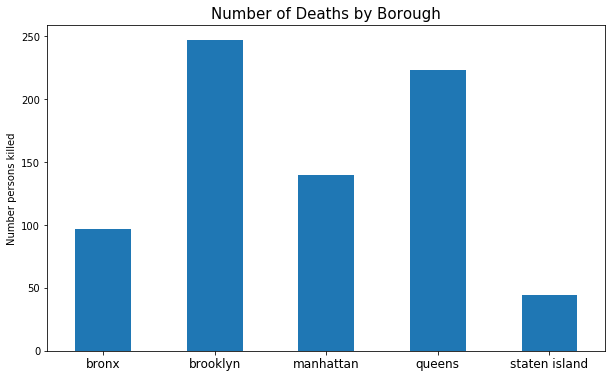

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
clean_nyc1.groupby('borough').persons_killed.sum().plot(kind='bar', figsize=(10, 6))
plt.ylabel('Number persons killed')
plt.title('Number of Deaths by Borough', fontsize=15)
plt.xticks(rotation=0, fontsize='large')
plt.xlabel(' ')

persons_killed1 = clean_nyc1.groupby('borough').persons_killed.sum().reset_index()
persons_killed1 ['sum'] = persons_killed1['persons_killed'].cumsum()

It looks like Brooklyn and Queens have the highest probability of death, meanwhile Staten Island has the lowest. Interesting.

## Number of deaths by hour  <a id='Fataities_by_hour'></a>

Let's see the mean of persons killed by hour. We are interested in seeing the percentage rate of persons killed for each hour. We want to see this information hourly to get a better general idea. 

Text(0.5, 0, 'time')

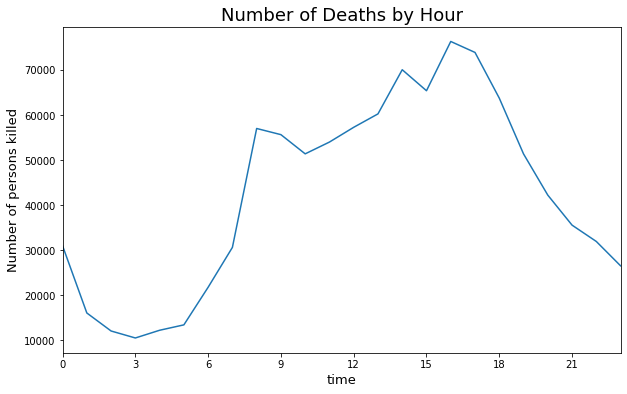

In [75]:
clean_nyc1.groupby(clean_nyc1.hour).persons_killed.count().plot(figsize=(10, 6))
plt.title('Number of Deaths by Hour', fontsize=18)
plt.ylabel('Number of persons killed', fontsize=13)
plt.xticks(np.arange(0, 24, step=3))
plt.xlabel('time', fontsize=13)

It looks like the number of deaths go up between 14:00 and 17:00. They decrease between 2:00 and 7:00, while most people are sleeping.

## Number of accidents by season <a id='accidents_by_season'></a>

Let's see the number of accidents by season.

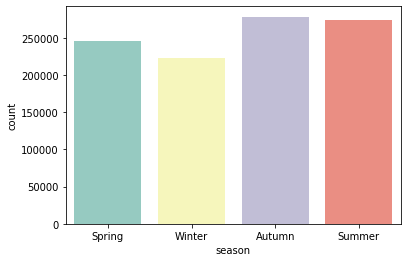

In [76]:
import seaborn as sns
ax = sns.countplot(x='season', data=clean_nyc1, palette='Set3')

Autumn and Summer have higher number of accidents compared to Spring and Winter.

## Fatal Car Crash Locations <a id='car_crash_locations'></a>

We will have to prepare a new dataframe with the latitude and longitude values, before this can work. We'll also include other columns we may want to display in the visualization in some way, shape, or form.

In [77]:
crash_locations = clean_nyc1[['borough', 'crash_date', 'latitude' ,'longitude','persons_killed',
                           'cyclist_killed', 'pedestrians_killed','motorist_killed']].copy()
crash_locations.head()

,borough,crash_date,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
0,staten island,2019-04-06,40.571987,-74.108230,0.0,0,0,0
3,staten island,2019-04-03,40.644073,-74.077774,0.0,0,0,0
4,NaN,2019-04-03,NaN,NaN,0.0,0,0,0
5,brooklyn,2019-04-20,40.651604,-73.933304,0.0,0,0,0
13,queens,2019-04-18,40.699356,-73.842350,0.0,0,0,0


The first thing we will do is remove any non-fatal rows. To do so, we must first change the `persons_killed` column values from float to integer. 

In [78]:
crash_locations.dropna(subset = ['persons_killed'], how='all', inplace=True)
crash_locations['persons_killed'] = crash_locations.persons_killed.astype(int)
crash_locations.head()

,borough,crash_date,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
0,staten island,2019-04-06,40.571987,-74.108230,0,0,0,0
3,staten island,2019-04-03,40.644073,-74.077774,0,0,0,0
4,NaN,2019-04-03,NaN,NaN,0,0,0,0
5,brooklyn,2019-04-20,40.651604,-73.933304,0,0,0,0
13,queens,2019-04-18,40.699356,-73.842350,0,0,0,0


Much better. Now to drop the rows.

In [79]:
crash_locations = crash_locations[crash_locations.persons_killed != 0].reset_index()
crash_locations.head()

,index,borough,crash_date,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
0,1882,NaN,2019-04-02,40.642384,-73.92539,1,0,0,1
1,2451,brooklyn,2019-03-30,40.628530,-73.92210,1,0,0,1
2,2715,NaN,2019-04-11,40.812077,-73.88681,1,0,0,1
3,4196,NaN,2019-04-04,40.728570,-73.85809,1,1,0,0
4,4494,queens,2019-04-06,40.665630,-73.73921,1,0,1,0


Let's take a look to see if we can clean up this dataframe anymore.

In [80]:
crash_locations.shape

(1133, 9)

In [81]:
crash_locations.describe()

,index,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
count,1.133000e+03,989.000000,989.000000,1133.000000,1133.000000,1133.000000,1133.000000
mean,7.770340e+05,40.679122,-73.841011,1.052074,0.087379,0.458959,0.504854
std,4.660949e+05,1.297616,2.352170,0.343963,0.285624,0.534451,0.593861
min,1.882000e+03,0.000000,-74.236680,1.000000,0.000000,0.000000,0.000000
25%,3.794640e+05,40.659645,-73.966129,1.000000,0.000000,0.000000,0.000000
50%,7.694320e+05,40.717926,-73.917965,1.000000,0.000000,0.000000,0.000000
75%,1.177810e+06,40.774960,-73.858220,1.000000,0.000000,1.000000,1.000000
max,1.617277e+06,40.906340,0.000000,8.000000,2.000000,6.000000,5.000000


It looks like we have 1127 rows, and we have missing lat/long values. For our purposes, we will drop those values now. There may be other ways to recover the data, or an approximation thereof, but it is beyond the scope of this notebook.

In [82]:
crash_locations.dropna(subset = ['latitude'], how='all', inplace=True)
crash_locations.dropna(subset = ['longitude'], how='all', inplace=True)
crash_locations.describe()

,index,latitude,longitude,persons_killed,cyclist_killed,pedestrians_killed,motorist_killed
count,9.890000e+02,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,7.558297e+05,40.679122,-73.841011,1.056623,0.086957,0.476239,0.492417
std,4.702037e+05,1.297616,2.352170,0.363893,0.285482,0.540553,0.601275
min,1.882000e+03,0.000000,-74.236680,1.000000,0.000000,0.000000,0.000000
25%,3.437810e+05,40.659645,-73.966129,1.000000,0.000000,0.000000,0.000000
50%,7.131230e+05,40.717926,-73.917965,1.000000,0.000000,0.000000,0.000000
75%,1.164419e+06,40.774960,-73.858220,1.000000,0.000000,1.000000,1.000000
max,1.617277e+06,40.906340,0.000000,8.000000,2.000000,6.000000,5.000000


And finally, we can map these values.

In [ ]:
# Please use google colab to see the visualization. 
# The link to the google colab of this file can be found at the top of the README.md file

import plotly.express as px

fig = px.scatter_mapbox(crash_locations, lat='latitude', lon='longitude',
                        size = "persons_killed",
                        hover_name="persons_killed",
                        hover_data=["pedestrians_killed", "cyclist_killed", "motorist_killed"],
                        color="persons_killed",
                        range_color=[1,8],
                        opacity=0.5,
                        width =850,
                        zoom=9,
                       )
fig.update_layout(title='Fatal Car Crash Locations')
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=286)
fig

This looks pretty scary! These deaths represent pedestrians, cyclists, and motorists. It is hard to find roads where people have not been killed by cars in NYC!

Though we must remember that this map represents deaths over nearly a decade.

## Contributing factor trends <a id='contributing_factor_trends'></a>

We will use Plotly, specifically, `plotly.express` to visualize some contributing factor trends.

In [83]:
clean_nyc1['contributing_factor_vehicle_1'].unique()

array(['road defects', 'traffic recklessness',
       'driver inattention/distraction', 'outside error', 'car defects',
       'drugs (illegal)', 'illness'], dtype=object)

In [ ]:
# Please use google colab to see the visualization. 
# The link to the google colab of this file can be found at the top of the README.md file

import plotly.graph_objects as go
fig = px.box(clean_nyc1, x="persons_killed", y="contributing_factor_vehicle_1")
fig.show()

Most collisions that result in one or two deaths are due to driver inattention, meanwhile most collisions that result in no death are due to illegal drugs.

Let's see when the accidents, in which more than one person die, tend to occur.

In [ ]:
# Please use google colab to see the visualization. 
# The link to the google colab of this file can be found at the top of the README.md file

fig = px.scatter (clean_nyc1, x= 'persons_killed', y= 'hour')
fig.show()

The collisions that result with more than one persons death tend to occur between 22:00 and 04:00.

## Contributing factors to crash fatalities <a id='Factor_Bar_Plot'></a>

We will use the 'value_counts' function to see how frequently contributing factor values appear in the data.

In [84]:
clean_nyc1['contributing_factor_vehicle_1'].value_counts()

traffic recklessness              451526
driver inattention/distraction    367819
road defects                       60738
outside error                      56991
illness                            47238
car defects                        19342
drugs (illegal)                    16251
Name: contributing_factor_vehicle_1, dtype: int64

For now, we'll just analyze the first contributing factor to get a general sense of the data. Let's look into the causes of fatal car crashes. We'll start by creating a new dataframe that groups those causes.

In [85]:
counted_lethal_crash_factors = clean_nyc1.groupby('contributing_factor_vehicle_1').persons_killed.sum().reset_index().sort_values("persons_killed", ascending = False)
counted_lethal_crash_factors.head()

,contributing_factor_vehicle_1,persons_killed
6,traffic recklessness,453.0
1,driver inattention/distraction,289.0
5,road defects,201.0
3,illness,99.0
4,outside error,73.0


Finally, let's drop 0's if we have any.

In [86]:
counted_lethal_crash_factors = counted_lethal_crash_factors[counted_lethal_crash_factors.persons_killed != 0]
counted_lethal_crash_factors.tail()

,contributing_factor_vehicle_1,persons_killed
5,road defects,201.0
3,illness,99.0
4,outside error,73.0
2,drugs (illegal),71.0
0,car defects,6.0


Great. Now let's visualize fatal car crash causes in NYC.

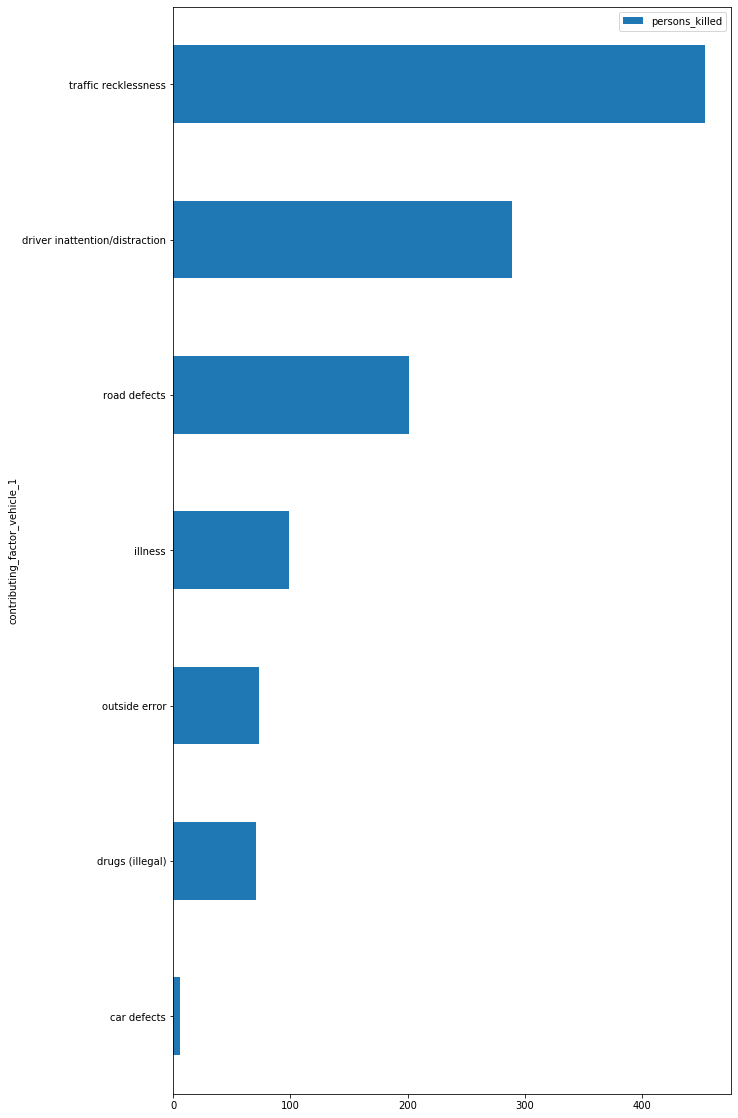

In [87]:
counted_lethal_crash_factors.plot.barh("contributing_factor_vehicle_1", 
                                      "persons_killed",
                                      figsize = (10,20)
                                      ).invert_yaxis()

This horizontal bar chart gives a slightly better sense of the data, that fatal accidents are mostly caused by traffic recklessness.

This is of course only looking at fatal accidents, only at the first recorded cause, and the reports are likely not 100% reliable. However, if NYC's government wanted to do more to reduce fatalities, this is useful information.

## Fatalities to pedestrians vs cyclists vs motorist <a id='Fataity_Grouped_Series'></a>

For this we'll use Seaborn to compare the distribution of fatalities by the category of persons killed. We'll group each category from our original dataframe into its own dataframe. We will then add a column to each dataframe which creates a running total of persons killed, using the cumsum function.

In [88]:
killed_motorists = clean_nyc1.groupby('crash_date').motorist_killed.sum().reset_index()
killed_motorists['sum'] = killed_motorists['motorist_killed'].cumsum()

killed_cyclist = clean_nyc1.groupby('crash_date').cyclist_killed.sum().reset_index()
killed_cyclist['sum'] = killed_cyclist['cyclist_killed'].cumsum()

killed_pedestrians = clean_nyc1.groupby('crash_date').pedestrians_killed.sum().reset_index()
killed_pedestrians['sum'] = killed_pedestrians['pedestrians_killed'].cumsum()

Now we can plot these using Seaborn, a library built to handle python data visualizations.

For this graph, we will overlay the rolling sum of fatalities (grouped by travel type) on the same graph, to get a sense of relative danger.

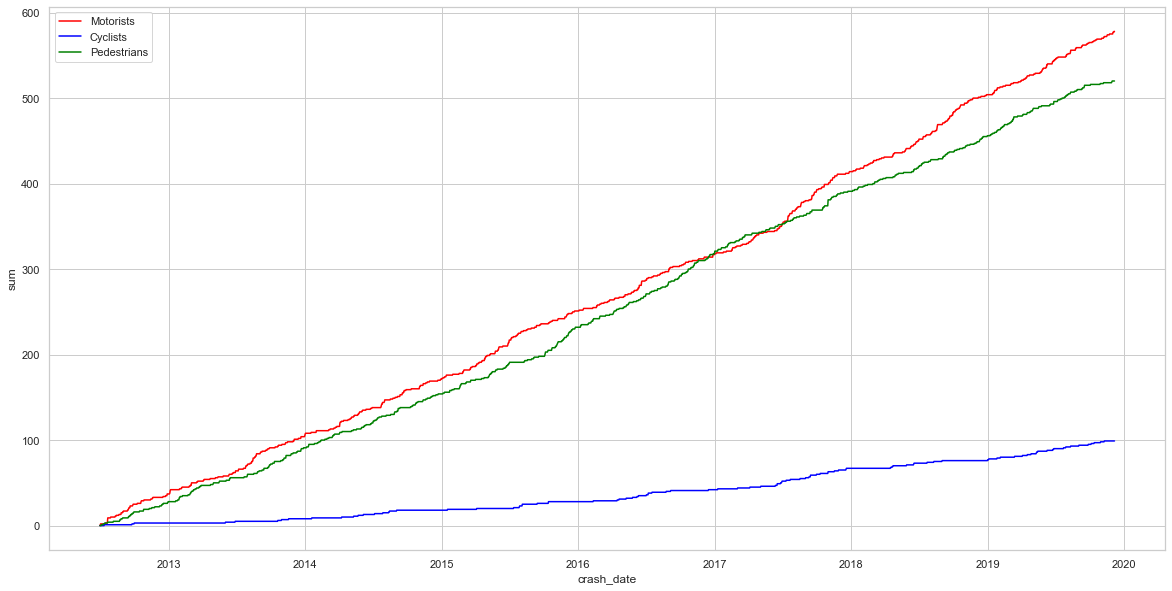

In [89]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='crash_date', y='sum', color = 'red', data=killed_motorists, ax=ax)
sns.lineplot( x='crash_date', y='sum', color = 'blue', data=killed_cyclist, ax=ax)
sns.lineplot( x='crash_date', y='sum', color = 'green', data=killed_pedestrians, ax=ax)
ax.legend(['Motorists', 'Cyclists', 'Pedestrians'], facecolor='w')

plt.show()

This is interesting. More pedestrians are killed than motorists by car crashes. I guess that is not entirely surprising, but it is disheartening.

This analysis lends itself well to comparing injury rates as well, which we would expect to be significantly higher.

Assuming there was more time, further analysis into the rates of change in the fatality set (to see if NYC is getting safer or more dangerous) would be manageable with another function over these data sets.

## Fatal crash frequency over time <a id='Fatality_Time_Scatterplot'></a>

To visualize the data we need to refine our dataframe. We'll try to sort rows where fatalities occurred into a new dataframe, then we need to group by date and sum.

In [90]:
lethal_crashes = clean_nyc1[clean_nyc1['persons_killed'] > 0]
lethal_crashes.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,vehicle_type_code_1,vehicle_type_code_2,hour,season
1882,2019-04-02,2019-12-11 16:31:00,NaN,nan,40.642384,-73.92539,2.0,1.0,0,0,0,0,2,1,traffic recklessness,unspecified,sedan,sedan,16,Spring
2451,2019-03-30,2019-12-11 16:21:00,brooklyn,11234,40.628530,-73.92210,2.0,1.0,0,0,0,0,2,1,road defects,unspecified,sedan,sedan,16,Spring
2715,2019-04-11,2019-12-11 15:31:00,NaN,nan,40.812077,-73.88681,1.0,1.0,0,0,0,0,1,1,illness,unspecified,tractor truck diesel,taxi,15,Spring
4196,2019-04-04,2019-12-11 16:35:00,NaN,nan,40.728570,-73.85809,0.0,1.0,0,0,0,1,0,0,illness,NaN,bicycle,NaN,16,Spring
4494,2019-04-06,2019-12-11 22:19:00,queens,11422,40.665630,-73.73921,0.0,1.0,0,1,0,0,0,0,traffic recklessness,pedestrian/bicyclist/other pedestrian error/co...,suv,sedan,22,Spring


Now to group by `crash_date`... We are going to use a number of chained functions here. We are adding up the number of fatalities per day, and sorting chronologically.

Sidenote: We changed the format in the time column, accidentally adding today's date, but that will not have an impact on our analysis.

In [91]:
clean_nyc1.groupby('crash_date').persons_killed.sum().reset_index().head(20)

,crash_date,persons_killed
0,2012-07-01,0.0
1,2012-07-02,1.0
2,2012-07-03,1.0
3,2012-07-04,0.0
4,2012-07-05,1.0
5,2012-07-06,0.0
6,2012-07-07,0.0
7,2012-07-08,0.0
8,2012-07-09,0.0
9,2012-07-10,1.0


Next, we'll port this into a new dataframe with some other fields we are interested in for analysis, then try to use matplotlib.

In [92]:
counted_lethal_crashes = clean_nyc1.groupby(['crash_date','borough', 'contributing_factor_vehicle_1']).persons_killed.sum().reset_index()
counted_lethal_crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69711 entries, 0 to 69710
Data columns (total 4 columns):
crash_date                       69711 non-null datetime64[ns]
borough                          69711 non-null object
contributing_factor_vehicle_1    69711 non-null object
persons_killed                   69711 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.1+ MB


Let's visualize it!

In [ ]:
import matplotlib.pyplot as plt
plt.show() #makes graph space appear
fig, ax = plt.subplots(figsize=(20,10)) # Create the plot space upon which to plot the data
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


x = counted_lethal_crashes['crash_date']
y = counted_lethal_crashes['persons_killed']

ax.plot(x,y,
        linestyle='',
        marker='x',
        alpha = 0.5,
        color='Red'
       )

ax.set(xlabel="Date",
       ylabel="Killed Count",
       title="Number of people killed by motorists in NYC") # Set title and labels for axes

We have successfully plotted the Car crash fatalities in NYC over time!

We can see from this that the majority of crashes have either 0 or 1 persons killed. Though there are some outliers. We could plug other columns into this chart, and see distributions of pedestrians, cyclists, motorists killed, but it will be easier and more visually appealing with pandas and seaborn. Here it is hard to get a precise view of the data, though it does help us know where to look.

## Crash factor percentages in Queens <a id='queens_crash_causes'></a>

Let's check out our data for boroughs.

In [93]:
top_boroughs = clean_nyc1['borough'].value_counts()
top_boroughs

brooklyn         191901
queens           184296
manhattan        179174
bronx             86258
staten island     28075
Name: borough, dtype: int64

Now we'll look at the crashes to see what factor contributed first to the crash by each borough. We select out these columns and put into a dataframe to look at the information.


I would like to select out for the borough of Queens and look just at this neighborhood for crash data. So, I select only this variable from the borough column and make a dataframe for factor contributing to vehicle crash for neighborhood Queens. This comparison is for the first factor involved in the crash. 

In [94]:
borough_factor = clean_nyc1.loc[:, ['borough', 'contributing_factor_vehicle_1']]
queens_data = borough_factor[borough_factor.borough == 'queens']
queens_data.head()

,borough,contributing_factor_vehicle_1
13,queens,traffic recklessness
20,queens,traffic recklessness
22,queens,traffic recklessness
26,queens,driver inattention/distraction
34,queens,traffic recklessness


For this data, what are the numbers for each contributing factor. 

In [95]:
reason_counts = queens_data['contributing_factor_vehicle_1'].value_counts()
reason_counts

traffic recklessness              81363
driver inattention/distraction    69932
road defects                      12178
illness                            8865
outside error                      5573
drugs (illegal)                    3453
car defects                        2932
Name: contributing_factor_vehicle_1, dtype: int64

Now we will find the percentage contribution of each factor for the borough Queens and the first contributing factor involved in the crash to determine which factor had the greatest impact for this group. This will be expressed as a percentage of the total number of contributing factors. 

In [96]:
total_reason_counts = reason_counts.sum()
total_reason_counts

184296

In [97]:
reason_counts1 = reason_counts/total_reason_counts*100
reason_counts1

traffic recklessness              44.148001
driver inattention/distraction    37.945479
road defects                       6.607848
illness                            4.810197
outside error                      3.023940
drugs (illegal)                    1.873616
car defects                        1.590919
Name: contributing_factor_vehicle_1, dtype: float64

The greatest impact to crash was traffic recklessness, which is followed by 'Driver Inattention/Distraction'.

Text(0.5, 1.0, 'Percentage of Factors leading to crashes in Queens')

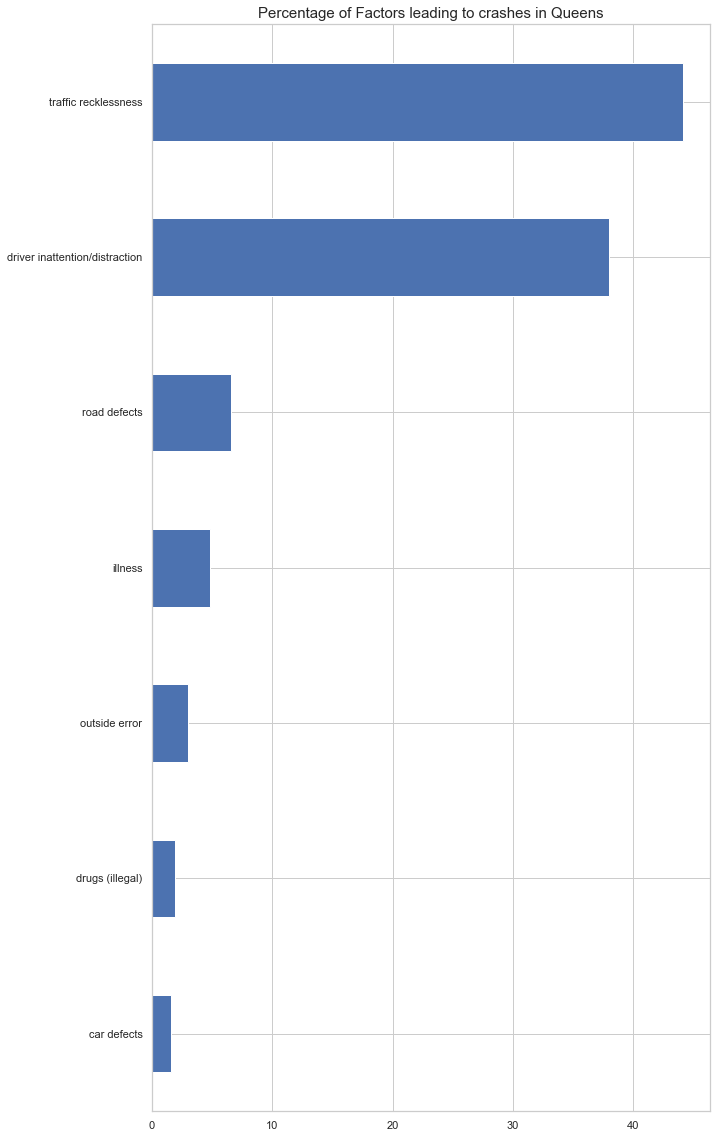

In [98]:
reason_counts1.plot.barh(figsize = (10,20)
                        ).invert_yaxis()
plt.title('Percentage of Factors leading to crashes in Queens', fontsize=15)

# <center> <br>[Beginning of the page](#Top)</center> <a id='Bottom'></a>